In [50]:
%matplotlib inline
import numpy as np

interesting_scan = "scan10159.png"
angles = [-1.9367, -1.57397, -1.30476, -0.871566, -0.57881, -0.180617, 0.088762, 0.451829, 0.80315, 1.20124, 1.49388, 1.83324, 2.20757, 2.54663, 2.87384, 3.23588, 3.53933, 3.93585, 4.21552, 4.5881, 4.91379, 5.25078, 5.6106, 5.9584, 6.32889, 6.67575, 6.99904, 7.28731, 7.67877, 8.05803, 8.31047, 8.71141, 9.02602, 9.57351, 10.0625, 10.4707, 10.9569, 11.599, 12.115, 12.5621, 13.041, 13.4848, 14.0483, 14.5981, 15.1887, 15.6567, 16.1766, 16.554, 17.1868, 17.7304, 18.3234, 18.7971, 19.3202, 19.7364, 20.2226, 20.7877, 21.3181, 21.9355, 22.4376, 22.8566, 23.3224, 23.971, 24.5066, 24.9992]
angles.reverse()

short_plot = (6, 2)
small_plot = (15, 2)
medium_plot = (18, 10)
big_plot = (100, 3)

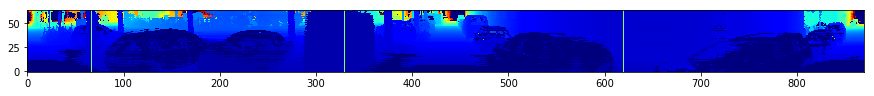

In [51]:
import matplotlib.pyplot as plt
import PIL.Image
import numpy as np
image = PIL.Image.open(interesting_scan)

np_image = np.array(image)
np_image = np_image / 500.
np_image = np.flipud(np_image)
image_copy = np_image.copy()
# mark needed columns with color
image_copy[:,67] = 40
image_copy[:,330] = 40
image_copy[:,620] = 40

plt.figure(figsize=small_plot)
imgplot = plt.imshow(image_copy, origin='lower', cmap='jet')

In [52]:
def draw_depth_at_row(row, image, start_idx=0, end_idx=64):
    y_list = list(range(0,len(angles)))
    lineplot = plt.plot(y_list[start_idx:end_idx], image[start_idx:end_idx, row])
    return image[:, row]

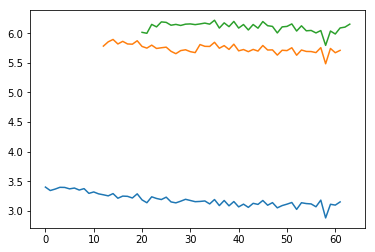

In [53]:
depth_vals_330 = draw_depth_at_row(330, np_image, 0, 62)
depth_vals_620 = draw_depth_at_row(620, np_image, 12, 62)
depth_vals_67 = draw_depth_at_row(67, np_image, 20, 64)

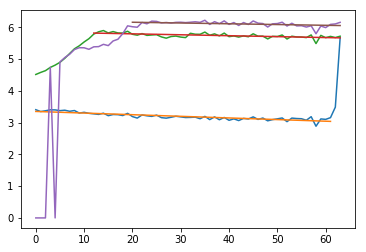

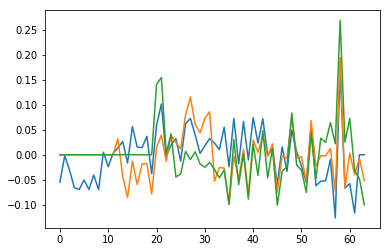

In [54]:
def compute_correction(depth_vals, start=0, end=64):
    from scipy import stats
    all_cols = range(len(depth_vals))
    col_nums = range(start, end)
    slope, intercept, r_value, p_value, std_err = stats.linregress(col_nums, depth_vals[start:end])
    line_vals = [slope * x + intercept for x in all_cols]
    plt.plot(all_cols, depth_vals)
    plt.plot(col_nums, line_vals[start:end])
    diffs = []
    for ind, (x_orig, x_corr) in enumerate(zip(depth_vals, line_vals)):
        if (ind < start or ind >= end):
            diffs.append(0)
            continue;
        diffs.append(x_corr - x_orig)
    return diffs
    
diff_vals_330 = compute_correction(depth_vals_330, 0, 62)
diff_vals_620 = compute_correction(depth_vals_620, 12, 64)
diff_vals_67 = compute_correction(depth_vals_67, 20, 64)
plt.figure()
plt.plot(diff_vals_330)
plt.plot(diff_vals_620)
plt.plot(diff_vals_67)

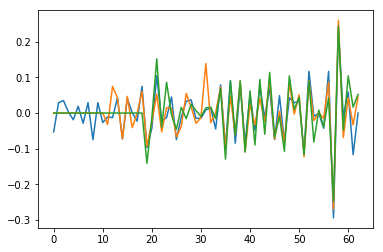

In [56]:
def plot_diff_to_prev(input_list):
    plt.plot([x - x_prev for x, x_prev in zip(input_list[:-1], input_list[1:])]) 

plot_diff_to_prev(diff_vals_330)
plot_diff_to_prev(diff_vals_620)
plot_diff_to_prev(diff_vals_67)